In [ ]:
!pip install torch torchvision opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving W (3).zip to W (3).zip


In [ ]:
import zipfile
import os

zip_path = "W (3).zip"  # replace with your actual file name

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("unzipped_data")

print("✅ Unzipped!")

✅ Unzipped!


In [ ]:
import os

for root, dirs, files in os.walk("unzipped_data"):
    print("📁", root)
    for f in files[:5]:
        print("  └──", f)


📁 unzipped_data
📁 unzipped_data/W
📁 unzipped_data/W/CW
  └── CW (1945).jpg
  └── CW (3104).jpg
  └── CW (1157).jpg
  └── CW (3687).jpg
  └── CW (2565).jpg
📁 unzipped_data/W/UW
  └── ncw (440).jpg
  └── ncw (2282).jpg
  └── ncw (354).jpg
  └── ncw (858).jpg
  └── ncw (3534).jpg


In [ ]:
import shutil
import os

# Create target folders
os.makedirs("data/cracked", exist_ok=True)
os.makedirs("data/uncracked", exist_ok=True)

# Move files
shutil.move("unzipped_data/W/CW", "data/cracked")
shutil.move("unzipped_data/W/UW", "data/uncracked")

print("✅ Data moved to correct structure!")

✅ Data moved to correct structure!


In [ ]:
# Show some file names
print("Cracked samples:", os.listdir("data/cracked")[:3])
print("Uncracked samples:", os.listdir("data/uncracked")[:3])


Cracked samples: ['CW']
Uncracked samples: ['UW']


In [ ]:
import os
import shutil

# Move cracked images from CW → data/cracked/
for file in os.listdir("data/cracked"):
    src = os.path.join("data/cracked", file)
    dst = os.path.join("data/cracked", file) # This line doesn't actually move or rename
    # shutil.move(src, dst) # This line is commented out as no move is needed

# Move uncracked images from UW → data/uncracked/
for file in os.listdir("data/uncracked"):
    src = os.path.join("data/uncracked", file)
    dst = os.path.join("data/uncracked", file) # This line doesn't actually move or rename
    # shutil.move(src, dst) # This line is commented out as no move is needed

print("✅ All files moved and organized correctly!")

✅ All files moved and organized correctly!


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define the image transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load dataset using ImageFolder
dataset = datasets.ImageFolder("data", transform=transform)

# Optional: check class names (should be ['cracked', 'uncracked'])
print("Class-to-Index mapping:", dataset.class_to_idx)


Class-to-Index mapping: {'cracked': 0, 'uncracked': 1}


In [ ]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

print("✅ Data loaders are ready!")


✅ Data loaders are ready!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load ResNet18 and modify the fc layer
model = resnet18(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 2)  # 2 output classes: cracked, uncracked
)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 173MB/s]


In [ ]:
num_epochs = 25

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    print(f"📘 Epoch [{epoch+1}/{num_epochs}] — Loss: {running_loss:.4f} — Accuracy: {acc:.2f}%")


📘 Epoch [1/25] — Loss: 224.4199 — Accuracy: 68.39%
📘 Epoch [2/25] — Loss: 187.9197 — Accuracy: 77.53%
📘 Epoch [3/25] — Loss: 173.0823 — Accuracy: 80.71%
📘 Epoch [4/25] — Loss: 158.0307 — Accuracy: 82.86%
📘 Epoch [5/25] — Loss: 144.8086 — Accuracy: 84.51%
📘 Epoch [6/25] — Loss: 137.4071 — Accuracy: 85.28%
📘 Epoch [7/25] — Loss: 126.5140 — Accuracy: 86.70%
📘 Epoch [8/25] — Loss: 116.7353 — Accuracy: 88.07%
📘 Epoch [9/25] — Loss: 104.6967 — Accuracy: 89.20%
📘 Epoch [10/25] — Loss: 93.8381 — Accuracy: 90.75%
📘 Epoch [11/25] — Loss: 82.5222 — Accuracy: 91.72%
📘 Epoch [12/25] — Loss: 66.9817 — Accuracy: 93.77%
📘 Epoch [13/25] — Loss: 57.2172 — Accuracy: 94.95%
📘 Epoch [14/25] — Loss: 52.4052 — Accuracy: 95.16%
📘 Epoch [15/25] — Loss: 38.9161 — Accuracy: 96.40%
📘 Epoch [16/25] — Loss: 34.1609 — Accuracy: 96.95%
📘 Epoch [17/25] — Loss: 27.9742 — Accuracy: 97.26%
📘 Epoch [18/25] — Loss: 23.7186 — Accuracy: 97.79%
📘 Epoch [19/25] — Loss: 25.0309 — Accuracy: 97.65%
📘 Epoch [20/25] — Loss: 26.4846

In [ ]:
torch.save(model.state_dict(), "crack_model.pth")
print("✅ Model saved as crack_model.pth")


✅ Model saved as crack_model.pth


In [ ]:
# Load the model for inference
model.load_state_dict(torch.load("crack_model.pth"))
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
print(f"📊 Total images: {len(dataset)}")
print(f"🧠 Training images: {len(train_dataset)}")
print(f"🧪 Validation (testing) images: {len(val_dataset)}")


📊 Total images: 7700
🧠 Training images: 6160
🧪 Validation (testing) images: 1540


In [ ]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


In [ ]:
from PIL import Image

def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    img_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(img_tensor)
        pred = torch.argmax(outputs, dim=1).item()

    return pred  # 0 = cracked, 1 = uncracked


In [ ]:
def detect_and_draw_cracks(image_path, output_folder="crack_outputs/all_cracks_highlighted/"):
    import cv2, os
    os.makedirs(output_folder, exist_ok=True)

    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 30, 150)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    crack_count = 0

    for i, cnt in enumerate(contours):
        if cv2.contourArea(cnt) > 100:
            crack_count += 1
            color = (int(i * 50) % 256, int(i * 80) % 256, int(i * 110) % 256)
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(image, (x, y), (x+w, y+h), color, 2)

    # Label it
    cv2.putText(image, f"Cracks: {crack_count}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)

    filename = os.path.basename(image_path)
    cv2.imwrite(os.path.join(output_folder, filename), image)
    return crack_count


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving c (59).jpg to c (59).jpg


In [ ]:
# ✅ Imports
import torch
import torch.nn as nn
from torchvision.models import resnet18
from torchvision import transforms
from PIL import Image

# ✅ Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Image transform (same as training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ✅ Load model and weights
model = resnet18(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 2)
)
model.load_state_dict(torch.load("crack_model.pth", map_location=device))
model.to(device)
model.eval()

# ✅ Prediction function
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    img_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img_tensor)
        predicted = torch.argmax(output, 1).item()

    if predicted == 0:
        print(f"🧠 Prediction for {image_path}: ✅ Cracked Image")
    else:
        print(f"🧠 Prediction for {image_path}: ✅ Uncracked Image")

# ✅ Run prediction on uploaded file(s)
for file_name in uploaded.keys():
    predict_image(file_name)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


🧠 Prediction for c (67).jpg: ✅ Cracked Image


In [ ]:
# ✅ Imports
import torch
import torch.nn as nn
from torchvision.models import resnet18
from torchvision import transforms
from PIL import Image

# ✅ Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Image transform (same as training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ✅ Load model and weights
model = resnet18(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 2)
)
model.load_state_dict(torch.load("crack_model.pth", map_location=device))
model.to(device)
model.eval()

# ✅ Prediction function
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    img_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img_tensor)
        predicted = torch.argmax(output, 1).item()

    if predicted == 0:
        print(f"🧠 Prediction for {image_path}: ✅ Cracked Image")
    else:
        print(f"🧠 Prediction for {image_path}: ✅ Uncracked Image")

# ✅ Run prediction on uploaded file(s)
for file_name in uploaded.keys():
    predict_image(file_name)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


🧠 Prediction for c (58).jpg: ✅ Cracked Image


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving N (58).jpg to N (58).jpg


In [ ]:
# ✅ Imports
import torch
import torch.nn as nn
from torchvision.models import resnet18
from torchvision import transforms
from PIL import Image

# ✅ Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Image transform (same as training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ✅ Load model and weights
model = resnet18(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 2)
)
model.load_state_dict(torch.load("crack_model.pth", map_location=device))
model.to(device)
model.eval()

# ✅ Prediction function
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    img_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img_tensor)
        predicted = torch.argmax(output, 1).item()

    if predicted == 0:
        print(f"🧠 Prediction for {image_path}: ✅ Cracked Image")
    else:
        print(f"🧠 Prediction for {image_path}: ✅ Uncracked Image")

# ✅ Run prediction on uploaded file(s)
for file_name in uploaded.keys():
    predict_image(file_name)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


🧠 Prediction for N (58).jpg: ✅ Uncracked Image


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Saving CT (1).jpg to CT (1).jpg

🖼️ Testing image: CT (1).jpg
🧠 Prediction: Cracked Image
🟦 Crack(s) highlighted and saved to: crack_outputs/all_cracks_highlighted/CT (1).jpg


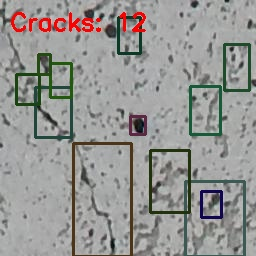

In [ ]:
# 📦 Install if not done already
# !pip install torchvision

import torch
import torch.nn as nn
from torchvision.models import resnet18
from torchvision import transforms
from PIL import Image
import cv2
import numpy as np
import os
from google.colab import files
from IPython.display import Image as IPyImage, display

# ✅ Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Image transform (same as training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ✅ Load the trained model
model = resnet18(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 2)  # Cracked = 0, Uncracked = 1
)
model.load_state_dict(torch.load("crack_model.pth", map_location=device))
model.to(device)
model.eval()

# ✅ Create output folder
output_folder = "crack_outputs/all_cracks_highlighted"
os.makedirs(output_folder, exist_ok=True)

# ✅ Crack detection function
def detect_and_draw_cracks(image_path):
    image = cv2.imread(image_path)
    original = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 30, 150)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    crack_count = 0

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 100:  # filter small noise
            crack_count += 1
            color = tuple(np.random.randint(0, 100, 3).tolist())  # dark color
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(image, (x, y), (x+w, y+h), color, 2)

    if crack_count > 0:
        filename = os.path.basename(image_path)
        output_path = os.path.join(output_folder, filename)
        cv2.putText(image, f"Cracks: {crack_count}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
        cv2.imwrite(output_path, image)
        return output_path
    else:
        return None

# ✅ Prediction + Highlight + Display
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    img_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(img_tensor)
        predicted = torch.argmax(outputs, 1).item()

    if predicted == 0:
        print("🧠 Prediction: Cracked Image")
        result_path = detect_and_draw_cracks(image_path)
        if result_path:
            print(f"🟦 Crack(s) highlighted and saved to: {result_path}")
            display(IPyImage(result_path))
        else:
            print("🟡 Model predicted 'Cracked' but no visible cracks found.")
    else:
        print("🧠 Prediction: Uncracked Image (no cracks to highlight)")
        display(IPyImage(image_path))

# ✅ Upload and Predict
uploaded = files.upload()

for filename in uploaded.keys():
    print(f"\n🖼️ Testing image: {filename}")
    predict_image(filename)


In [ ]:
import cv2
import numpy as np
import os

# 🔧 Folder to save individual crack images
individual_crack_folder = "crack_outputs/individual_cracks"
os.makedirs(individual_crack_folder, exist_ok=True)

# 🔍 Function: Extract and save each crack individually
def detect_and_save_individual_cracks(image_path):
    image = cv2.imread(image_path)
    original = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 30, 150)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    crack_count = 0
    filename = os.path.splitext(os.path.basename(image_path))[0]

    for i, cnt in enumerate(contours):
        area = cv2.contourArea(cnt)
        if area > 100:  # filter noise
            crack_count += 1

            # Make a copy of the original image
            crack_image = original.copy()

            # Get bounding box
            x, y, w, h = cv2.boundingRect(cnt)

            # Generate a dark color
            color = tuple(np.random.randint(0, 100, 3).tolist())

            # Draw just one crack box
            cv2.rectangle(crack_image, (x, y), (x + w, y + h), color, 2)
            cv2.putText(crack_image, f"Crack {crack_count}", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

            # Save the full image with only this crack highlighted
            output_path = os.path.join(individual_crack_folder, f"{filename}_crack_{crack_count}.jpg")
            cv2.imwrite(output_path, crack_image)

    print(f"✅ Saved {crack_count} individual crack image(s) from: {image_path}")
    return crack_count


In [ ]:
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    img_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(img_tensor)
        predicted = torch.argmax(outputs, 1).item()

    if predicted == 0:
        print("🧠 Prediction: Cracked Image")
        count = detect_and_save_individual_cracks(image_path)
        if count == 0:
            print("🟡 Predicted 'Cracked' but no cracks detected visually.")
    else:
        print("🧠 Prediction: Uncracked Image (no cracks to save)")


In [ ]:
from IPython.display import Image as IPyImage, display
import os

# Folder containing individual crack outputs
output_folder = "crack_outputs/individual_cracks"

# Display all images from the folder
for file_name in sorted(os.listdir(output_folder)):
    if file_name.lower().endswith(('.jpg', '.png')):
        file_path = os.path.join(output_folder, file_name)
        print(f"🖼️ {file_name}")
        display(IPyImage(file_path))


In [ ]:
for filename in uploaded.keys():
    print(f"\n🖼️ Testing image: {filename}")
    predict_image(filename)



🖼️ Testing image: CT (1).jpg
🧠 Prediction: Cracked Image
✅ Saved 12 individual crack image(s) from: CT (1).jpg


🖼️ CT (1)_crack_1.jpg


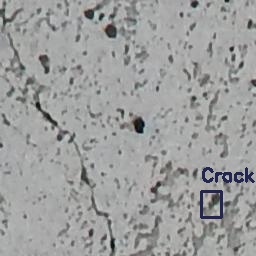

🖼️ CT (1)_crack_10.jpg


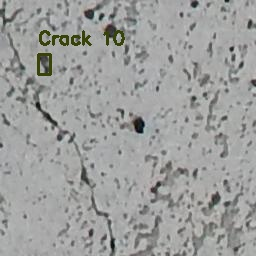

🖼️ CT (1)_crack_11.jpg


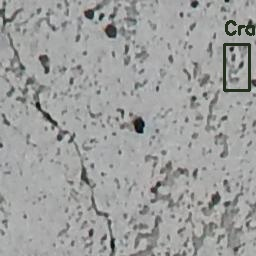

🖼️ CT (1)_crack_12.jpg


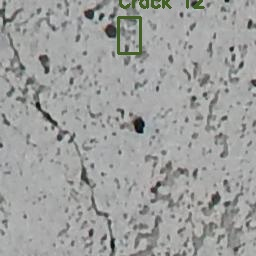

🖼️ CT (1)_crack_2.jpg


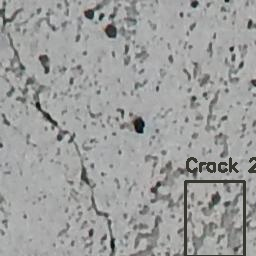

🖼️ CT (1)_crack_3.jpg


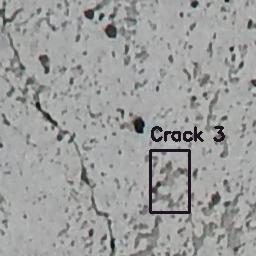

🖼️ CT (1)_crack_4.jpg


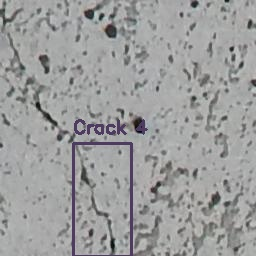

🖼️ CT (1)_crack_5.jpg


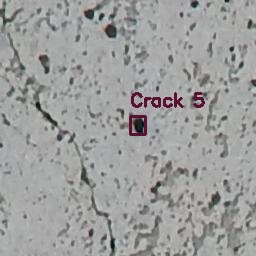

🖼️ CT (1)_crack_6.jpg


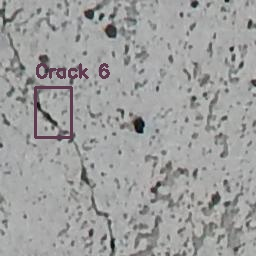

🖼️ CT (1)_crack_7.jpg


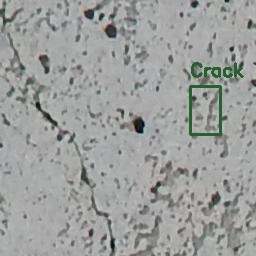

🖼️ CT (1)_crack_8.jpg


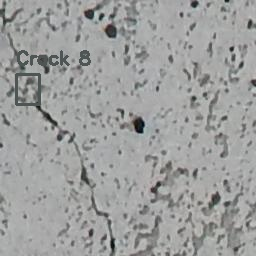

🖼️ CT (1)_crack_9.jpg


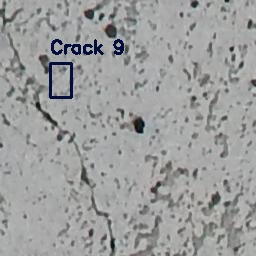

In [ ]:
from IPython.display import Image as IPyImage, display
import os

folder = "crack_outputs/individual_cracks"

# List and display all crack images for CT (1).jpg
for fname in sorted(os.listdir(folder)):
    if fname.startswith("CT (1)_crack_") and fname.endswith(".jpg"):
        fpath = os.path.join(folder, fname)
        print(f"🖼️ {fname}")
        display(IPyImage(fpath))


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving N (69).jpg to N (69).jpg


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



🖼️ Original image: N (69).jpg


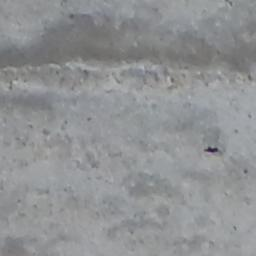

🧠 Prediction: 🟢 **Uncracked Image**


In [ ]:
# ✅ Imports
import torch
import torch.nn as nn
from torchvision.models import resnet18
from torchvision import transforms
from PIL import Image
from IPython.display import Image as IPyImage, display
import os

# ✅ Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Image transform (same as training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ✅ Load model and weights
model = resnet18(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 2)
)
model.load_state_dict(torch.load("crack_model.pth", map_location=device))
model.to(device)
model.eval()

# ✅ Prediction + Display function
def predict_and_show(image_path):
    print(f"\n🖼️ Original image: {os.path.basename(image_path)}")
    display(IPyImage(image_path))

    image = Image.open(image_path).convert("RGB")
    img_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img_tensor)
        predicted = torch.argmax(output, 1).item()

    if predicted == 0:
        print(f"🧠 Prediction: 🔴 **Cracked Image**")
    else:
        print(f"🧠 Prediction: 🟢 **Uncracked Image**")

# ✅ Run on all uploaded files
for file_name in uploaded.keys():
    predict_and_show(file_name)


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving c (60).jpg to c (60).jpg


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



🖼️ Original image: c (60).jpg


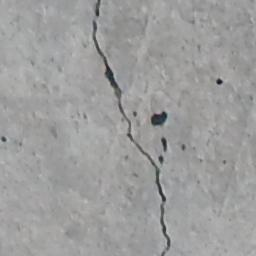

🧠 Prediction: 🔴 **Cracked Image**
🧩 2 crack(s) found in: c (60).jpg
✅ Crack highlighted image saved to: crack_outputs/highlighted/highlighted_c (60).jpg


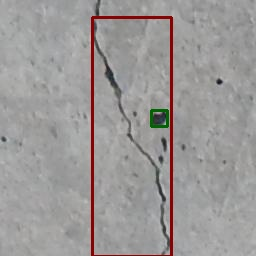

In [ ]:
# ✅ Imports
import torch
import torch.nn as nn
from torchvision.models import resnet18
from torchvision import transforms
from PIL import Image
import os
import cv2
import numpy as np
from IPython.display import Image as IPyImage, display

# ✅ Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Image transform (same as training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ✅ Load model
model = resnet18(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 2)
)
model.load_state_dict(torch.load("crack_model.pth", map_location=device))
model.to(device)
model.eval()

# ✅ Crack highlighting function
def highlight_cracks(img_path):
    save_dir = "crack_outputs/highlighted"
    os.makedirs(save_dir, exist_ok=True)

    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 30, 120)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours by area
    min_area = 30
    real_cracks = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    print(f"🧩 {len(real_cracks)} crack(s) found in: {os.path.basename(img_path)}")

    # Draw bounding boxes in different dark colors
    colors = [(0, 100, 0), (0, 0, 139), (139, 0, 0), (128, 0, 128), (0, 128, 128)]
    output = img.copy()

    for i, cnt in enumerate(real_cracks):
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(output, (x, y), (x + w, y + h), colors[i % len(colors)], 2)

    save_path = os.path.join(save_dir, f"highlighted_{os.path.basename(img_path)}")
    cv2.imwrite(save_path, output)
    print(f"✅ Crack highlighted image saved to: {save_path}")
    display(IPyImage(save_path))

# ✅ Prediction + Display + Crack Highlighting
def predict_and_show(image_path):
    print(f"\n🖼️ Original image: {os.path.basename(image_path)}")
    display(IPyImage(image_path))

    image = Image.open(image_path).convert("RGB")
    img_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img_tensor)
        predicted = torch.argmax(output, 1).item()

    if predicted == 0:
        print(f"🧠 Prediction: 🔴 **Cracked Image**")
        highlight_cracks(image_path)
    else:
        print(f"🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)")

# ✅ Run on uploaded files
for file_name in uploaded.keys():
    predict_and_show(file_name)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



🖼️ Original image: c (60).jpg


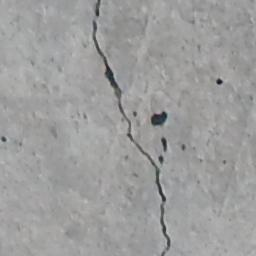

🧠 Prediction: 🔴 **Cracked Image**
🧩 2 crack(s) found in: c (60).jpg
✅ Crack highlighted image saved to: crack_outputs/highlighted/highlighted_c (60).jpg


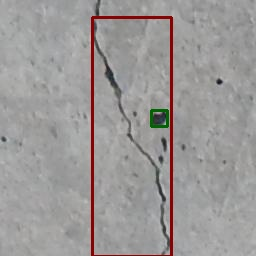

📦 Saving individual crack images:
  ➕ Saved: crack_outputs/individual_cracks/crack_1_c (60).jpg


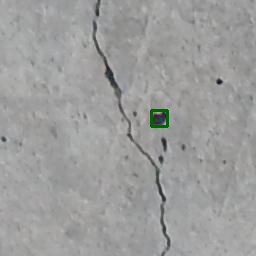

  ➕ Saved: crack_outputs/individual_cracks/crack_2_c (60).jpg


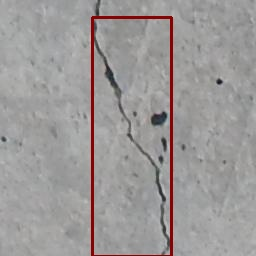

In [ ]:
# ✅ Imports
import torch
import torch.nn as nn
from torchvision.models import resnet18
from torchvision import transforms
from PIL import Image
import os
import cv2
import numpy as np
from IPython.display import Image as IPyImage, display

# ✅ Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Image transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ✅ Load model
model = resnet18(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 2)
)
model.load_state_dict(torch.load("crack_model.pth", map_location=device))
model.to(device)
model.eval()

# ✅ Crack highlighting function
def highlight_and_save_cracks(img_path):
    filename = os.path.basename(img_path)
    base_name = os.path.splitext(filename)[0]

    all_output_dir = "crack_outputs/highlighted"
    individual_output_dir = "crack_outputs/individual_cracks"
    os.makedirs(all_output_dir, exist_ok=True)
    os.makedirs(individual_output_dir, exist_ok=True)

    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ Error reading image: {img_path}")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 30, 120)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter valid cracks
    min_area = 30
    real_cracks = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
    print(f"🧩 {len(real_cracks)} crack(s) found in: {filename}")

    # All cracks in one image
    all_img = img.copy()
    colors = [(0, 100, 0), (0, 0, 139), (139, 0, 0), (128, 0, 128), (0, 128, 128),
              (255, 140, 0), (0, 191, 255), (220, 20, 60), (75, 0, 130), (128, 0, 0)]

    for i, cnt in enumerate(real_cracks):
        x, y, w, h = cv2.boundingRect(cnt)
        color = colors[i % len(colors)]
        cv2.rectangle(all_img, (x, y), (x + w, y + h), color, 2)

    all_path = os.path.join(all_output_dir, f"highlighted_{filename}")
    cv2.imwrite(all_path, all_img)
    print(f"✅ Crack highlighted image saved to: {all_path}")
    display(IPyImage(all_path))

    # One image per crack
    if len(real_cracks) == 0:
        print("⚠️ No cracks to extract.")
        return

    print("📦 Saving individual crack images:")
    for i, cnt in enumerate(real_cracks):
        indiv_img = img.copy()
        x, y, w, h = cv2.boundingRect(cnt)
        color = colors[i % len(colors)]
        cv2.rectangle(indiv_img, (x, y), (x + w, y + h), color, 2)

        indiv_path = os.path.join(individual_output_dir, f"crack_{i+1}_{filename}")
        cv2.imwrite(indiv_path, indiv_img)
        print(f"  ➕ Saved: {indiv_path}")
        display(IPyImage(indiv_path))

# ✅ Prediction + Display + Highlighting
def predict_and_show(image_path):
    print(f"\n🖼️ Original image: {os.path.basename(image_path)}")
    display(IPyImage(image_path))

    image = Image.open(image_path).convert("RGB")
    img_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img_tensor)
        predicted = torch.argmax(output, 1).item()

    if predicted == 0:
        print(f"🧠 Prediction: 🔴 **Cracked Image**")
        highlight_and_save_cracks(image_path)
    else:
        print(f"🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)")

# ✅ Run on uploaded images
for file_name in uploaded.keys():
    predict_and_show(file_name)


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving N (56).jpg to N (56).jpg


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



🖼️ Original image: N (56).jpg


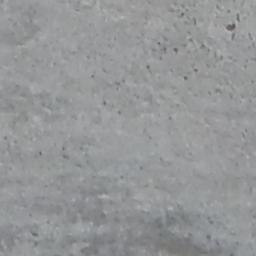

🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)


In [ ]:
# ✅ Imports
import torch
import torch.nn as nn
from torchvision.models import resnet18
from torchvision import transforms
from PIL import Image
import os
import cv2
import numpy as np
from IPython.display import Image as IPyImage, display

# ✅ Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Image transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ✅ Load model
model = resnet18(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 2)
)
model.load_state_dict(torch.load("crack_model.pth", map_location=device))
model.to(device)
model.eval()

# ✅ Crack highlighting function
def highlight_and_save_cracks(img_path):
    filename = os.path.basename(img_path)
    base_name = os.path.splitext(filename)[0]

    all_output_dir = "crack_outputs/highlighted"
    individual_output_dir = "crack_outputs/individual_cracks"
    os.makedirs(all_output_dir, exist_ok=True)
    os.makedirs(individual_output_dir, exist_ok=True)

    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ Error reading image: {img_path}")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 30, 120)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter valid cracks
    min_area = 30
    real_cracks = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
    print(f"🧩 {len(real_cracks)} crack(s) found in: {filename}")

    # All cracks in one image
    all_img = img.copy()
    colors = [(0, 100, 0), (0, 0, 139), (139, 0, 0), (128, 0, 128), (0, 128, 128),
              (255, 140, 0), (0, 191, 255), (220, 20, 60), (75, 0, 130), (128, 0, 0)]

    for i, cnt in enumerate(real_cracks):
        x, y, w, h = cv2.boundingRect(cnt)
        color = colors[i % len(colors)]
        cv2.rectangle(all_img, (x, y), (x + w, y + h), color, 2)

    all_path = os.path.join(all_output_dir, f"highlighted_{filename}")
    cv2.imwrite(all_path, all_img)
    print(f"✅ Crack highlighted image saved to: {all_path}")
    display(IPyImage(all_path))

    # One image per crack
    if len(real_cracks) == 0:
        print("⚠️ No cracks to extract.")
        return

    print("📦 Saving individual crack images:")
    for i, cnt in enumerate(real_cracks):
        indiv_img = img.copy()
        x, y, w, h = cv2.boundingRect(cnt)
        color = colors[i % len(colors)]
        cv2.rectangle(indiv_img, (x, y), (x + w, y + h), color, 2)

        indiv_path = os.path.join(individual_output_dir, f"crack_{i+1}_{filename}")
        cv2.imwrite(indiv_path, indiv_img)
        print(f"  ➕ Saved: {indiv_path}")
        display(IPyImage(indiv_path))

# ✅ Prediction + Display + Highlighting
def predict_and_show(image_path):
    print(f"\n🖼️ Original image: {os.path.basename(image_path)}")
    display(IPyImage(image_path))

    image = Image.open(image_path).convert("RGB")
    img_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img_tensor)
        predicted = torch.argmax(output, 1).item()

    if predicted == 0:
        print(f"🧠 Prediction: 🔴 **Cracked Image**")
        highlight_and_save_cracks(image_path)
    else:
        print(f"🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)")

# ✅ Run on uploaded images
for file_name in uploaded.keys():
    predict_and_show(file_name)


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving CT (1).jpg to CT (1) (1).jpg
Saving CT (5).jpg to CT (5).jpg
Saving CT (6).jpg to CT (6).jpg
Saving CT (7).jpg to CT (7).jpg
Saving CT (8).jpg to CT (8).jpg
Saving CT (9).jpg to CT (9).jpg
Saving CT (10).jpg to CT (10).jpg
Saving CT (11).jpg to CT (11).jpg
Saving CT (12).jpg to CT (12).jpg
Saving CT (13).jpg to CT (13).jpg
Saving CT (14).jpg to CT (14).jpg
Saving CT (15).jpg to CT (15).jpg
Saving CT (21).jpg to CT (21).jpg
Saving CT (27).jpg to CT (27).jpg
Saving CT (28).jpg to CT (28).jpg
Saving N (53).jpg to N (53).jpg
Saving N (54).jpg to N (54).jpg
Saving N (55).jpg to N (55).jpg
Saving N (56).jpg to N (56) (1).jpg
Saving N (57).jpg to N (57).jpg
Saving N (58).jpg to N (58) (1).jpg
Saving N (59).jpg to N (59).jpg
Saving N (60).jpg to N (60).jpg
Saving N (65).jpg to N (65).jpg
Saving N (66).jpg to N (66).jpg
Saving N (68).jpg to N (68).jpg
Saving N (69).jpg to N (69) (1).jpg
Saving N (70).jpg to N (70).jpg


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



🖼️ Original image: CT (1) (1).jpg


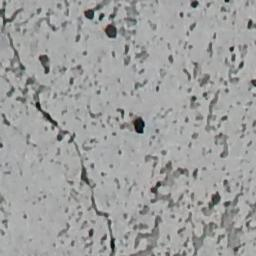

🧠 Prediction: 🔴 **Cracked Image**
🧩 56 crack(s) found in: CT (1) (1).jpg
✅ Crack highlighted image saved to: crack_outputs/highlighted/highlighted_CT (1) (1).jpg


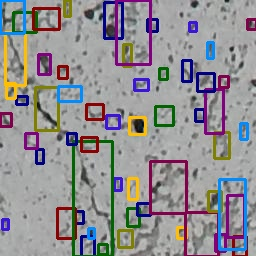

📦 Saving individual crack images:
  ➕ Saved: crack_outputs/individual_cracks/crack_1_CT (1) (1).jpg


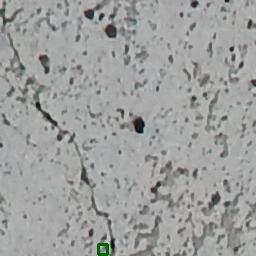

  ➕ Saved: crack_outputs/individual_cracks/crack_2_CT (1) (1).jpg


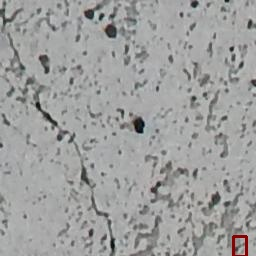

  ➕ Saved: crack_outputs/individual_cracks/crack_3_CT (1) (1).jpg


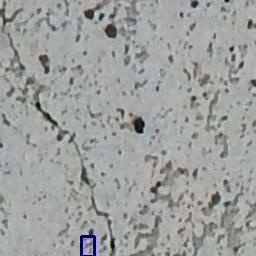

  ➕ Saved: crack_outputs/individual_cracks/crack_4_CT (1) (1).jpg


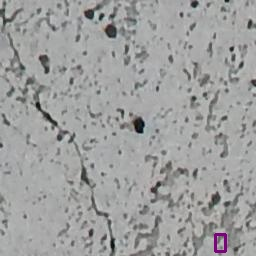

  ➕ Saved: crack_outputs/individual_cracks/crack_5_CT (1) (1).jpg


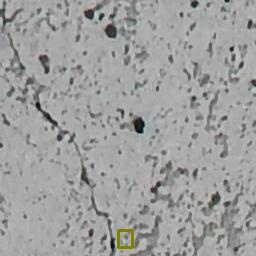

  ➕ Saved: crack_outputs/individual_cracks/crack_6_CT (1) (1).jpg


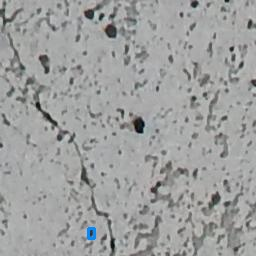

  ➕ Saved: crack_outputs/individual_cracks/crack_7_CT (1) (1).jpg


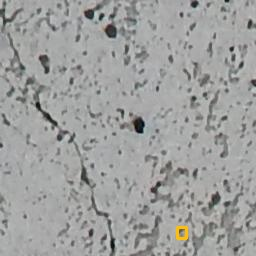

  ➕ Saved: crack_outputs/individual_cracks/crack_8_CT (1) (1).jpg


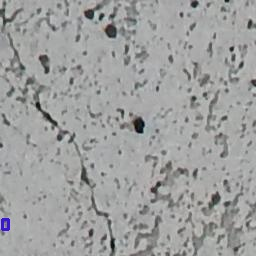

  ➕ Saved: crack_outputs/individual_cracks/crack_9_CT (1) (1).jpg


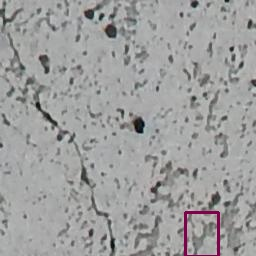

  ➕ Saved: crack_outputs/individual_cracks/crack_10_CT (1) (1).jpg


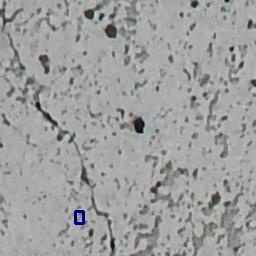

  ➕ Saved: crack_outputs/individual_cracks/crack_11_CT (1) (1).jpg


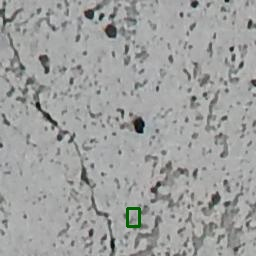

  ➕ Saved: crack_outputs/individual_cracks/crack_12_CT (1) (1).jpg


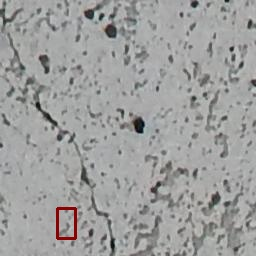

  ➕ Saved: crack_outputs/individual_cracks/crack_13_CT (1) (1).jpg


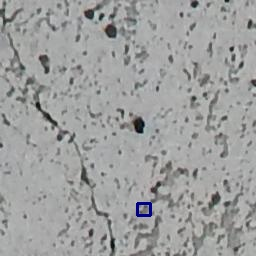

  ➕ Saved: crack_outputs/individual_cracks/crack_14_CT (1) (1).jpg


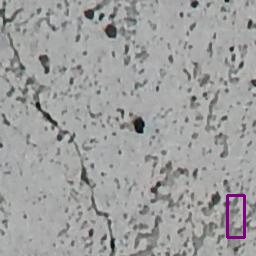

  ➕ Saved: crack_outputs/individual_cracks/crack_15_CT (1) (1).jpg


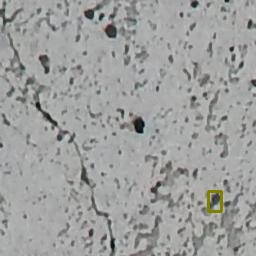

  ➕ Saved: crack_outputs/individual_cracks/crack_16_CT (1) (1).jpg


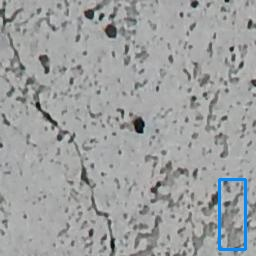

  ➕ Saved: crack_outputs/individual_cracks/crack_17_CT (1) (1).jpg


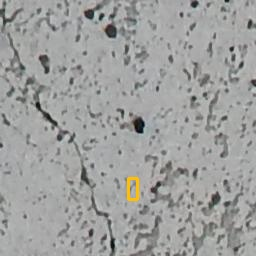

  ➕ Saved: crack_outputs/individual_cracks/crack_18_CT (1) (1).jpg


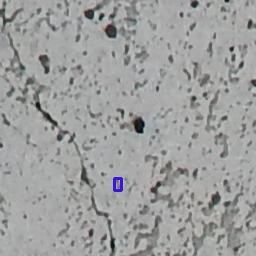

  ➕ Saved: crack_outputs/individual_cracks/crack_19_CT (1) (1).jpg


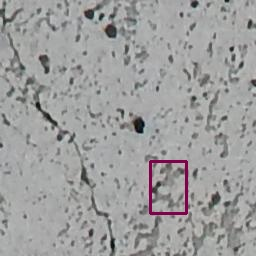

  ➕ Saved: crack_outputs/individual_cracks/crack_20_CT (1) (1).jpg


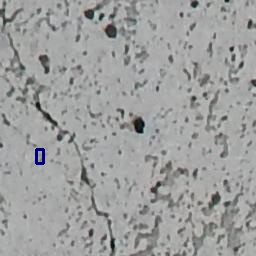

  ➕ Saved: crack_outputs/individual_cracks/crack_21_CT (1) (1).jpg


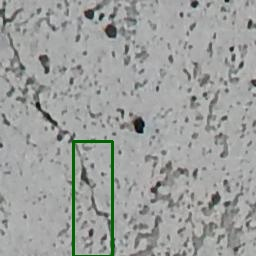

  ➕ Saved: crack_outputs/individual_cracks/crack_22_CT (1) (1).jpg


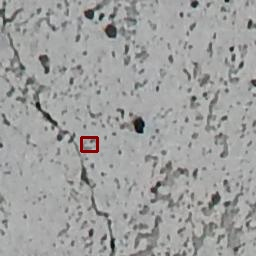

  ➕ Saved: crack_outputs/individual_cracks/crack_23_CT (1) (1).jpg


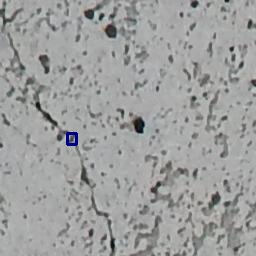

  ➕ Saved: crack_outputs/individual_cracks/crack_24_CT (1) (1).jpg


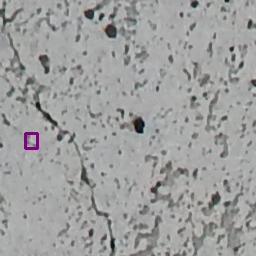

  ➕ Saved: crack_outputs/individual_cracks/crack_25_CT (1) (1).jpg


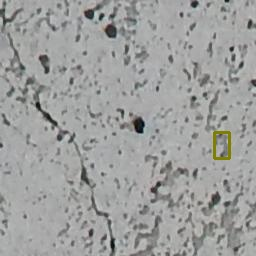

  ➕ Saved: crack_outputs/individual_cracks/crack_26_CT (1) (1).jpg


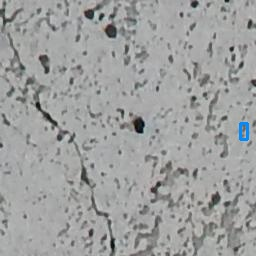

  ➕ Saved: crack_outputs/individual_cracks/crack_27_CT (1) (1).jpg


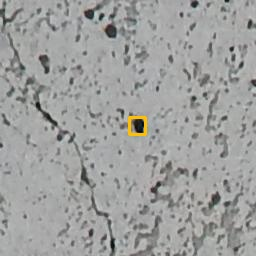

  ➕ Saved: crack_outputs/individual_cracks/crack_28_CT (1) (1).jpg


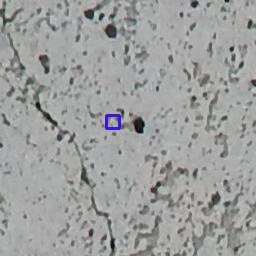

  ➕ Saved: crack_outputs/individual_cracks/crack_29_CT (1) (1).jpg


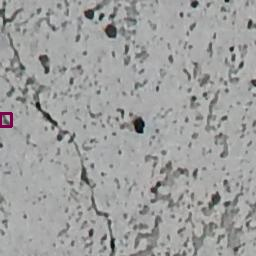

  ➕ Saved: crack_outputs/individual_cracks/crack_30_CT (1) (1).jpg


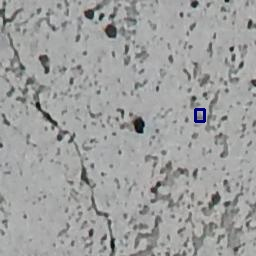

  ➕ Saved: crack_outputs/individual_cracks/crack_31_CT (1) (1).jpg


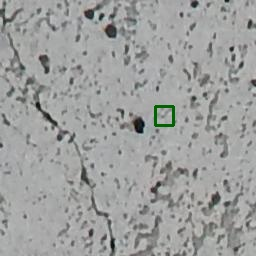

  ➕ Saved: crack_outputs/individual_cracks/crack_32_CT (1) (1).jpg


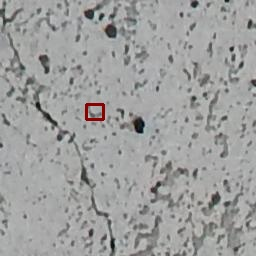

  ➕ Saved: crack_outputs/individual_cracks/crack_33_CT (1) (1).jpg


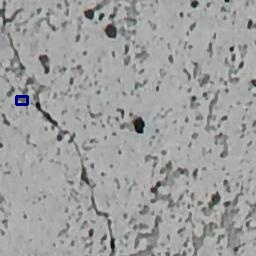

  ➕ Saved: crack_outputs/individual_cracks/crack_34_CT (1) (1).jpg


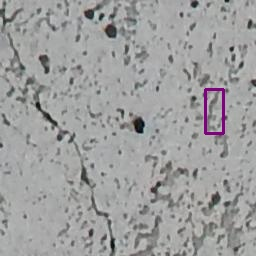

  ➕ Saved: crack_outputs/individual_cracks/crack_35_CT (1) (1).jpg


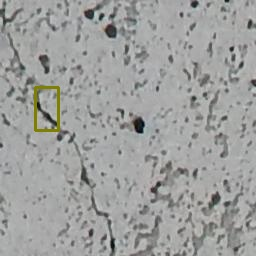

  ➕ Saved: crack_outputs/individual_cracks/crack_36_CT (1) (1).jpg


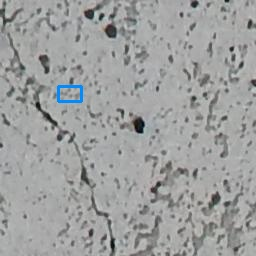

  ➕ Saved: crack_outputs/individual_cracks/crack_37_CT (1) (1).jpg


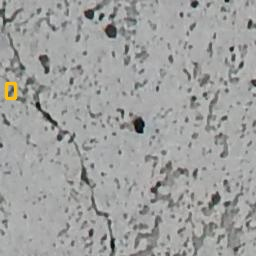

  ➕ Saved: crack_outputs/individual_cracks/crack_38_CT (1) (1).jpg


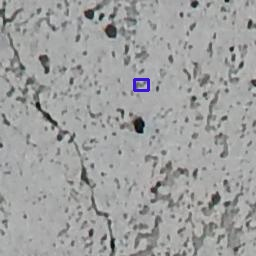

  ➕ Saved: crack_outputs/individual_cracks/crack_39_CT (1) (1).jpg


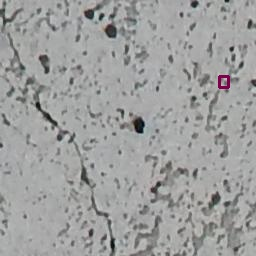

  ➕ Saved: crack_outputs/individual_cracks/crack_40_CT (1) (1).jpg


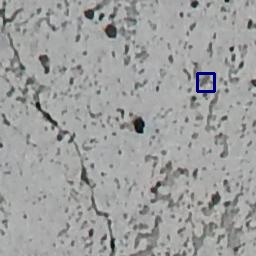

  ➕ Saved: crack_outputs/individual_cracks/crack_41_CT (1) (1).jpg


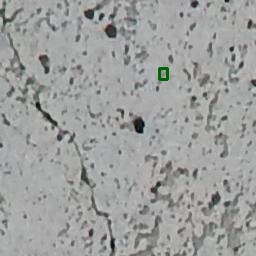

  ➕ Saved: crack_outputs/individual_cracks/crack_42_CT (1) (1).jpg


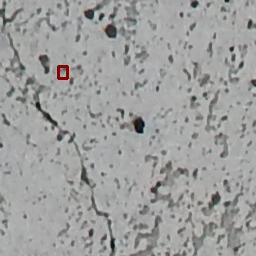

  ➕ Saved: crack_outputs/individual_cracks/crack_43_CT (1) (1).jpg


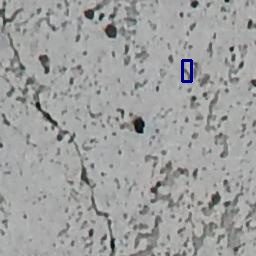

  ➕ Saved: crack_outputs/individual_cracks/crack_44_CT (1) (1).jpg


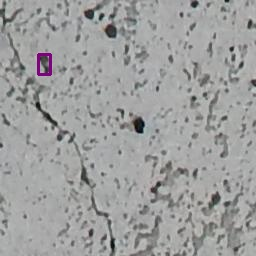

  ➕ Saved: crack_outputs/individual_cracks/crack_45_CT (1) (1).jpg


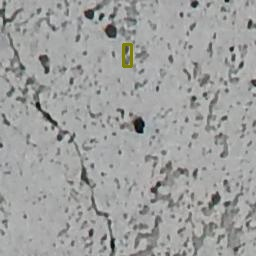

  ➕ Saved: crack_outputs/individual_cracks/crack_46_CT (1) (1).jpg


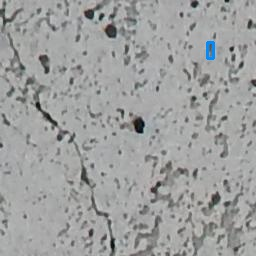

  ➕ Saved: crack_outputs/individual_cracks/crack_47_CT (1) (1).jpg


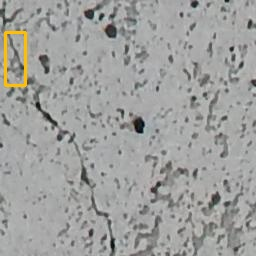

  ➕ Saved: crack_outputs/individual_cracks/crack_48_CT (1) (1).jpg


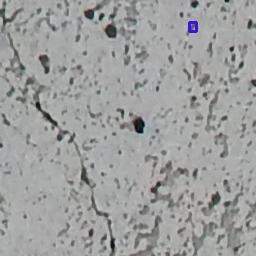

  ➕ Saved: crack_outputs/individual_cracks/crack_49_CT (1) (1).jpg


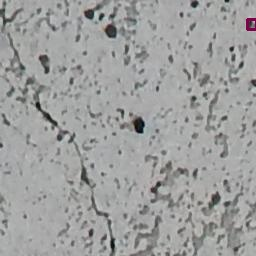

  ➕ Saved: crack_outputs/individual_cracks/crack_50_CT (1) (1).jpg


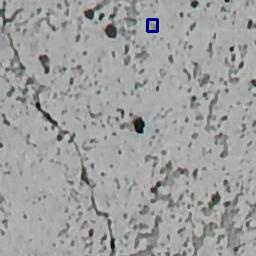

  ➕ Saved: crack_outputs/individual_cracks/crack_51_CT (1) (1).jpg


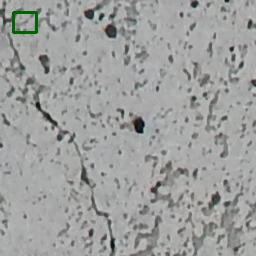

  ➕ Saved: crack_outputs/individual_cracks/crack_52_CT (1) (1).jpg


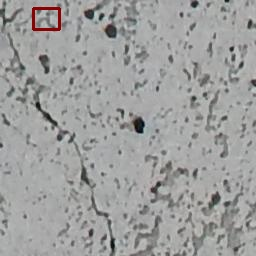

  ➕ Saved: crack_outputs/individual_cracks/crack_53_CT (1) (1).jpg


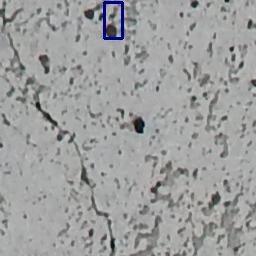

  ➕ Saved: crack_outputs/individual_cracks/crack_54_CT (1) (1).jpg


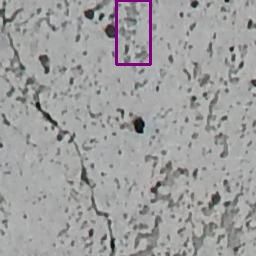

  ➕ Saved: crack_outputs/individual_cracks/crack_55_CT (1) (1).jpg


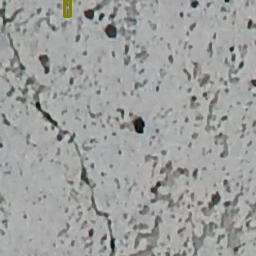

  ➕ Saved: crack_outputs/individual_cracks/crack_56_CT (1) (1).jpg


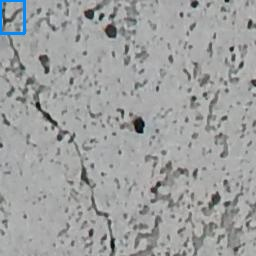


🖼️ Original image: CT (5).jpg


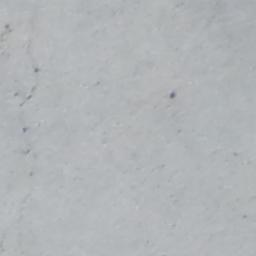

🧠 Prediction: 🔴 **Cracked Image**
🧩 0 crack(s) found in: CT (5).jpg
✅ Crack highlighted image saved to: crack_outputs/highlighted/highlighted_CT (5).jpg


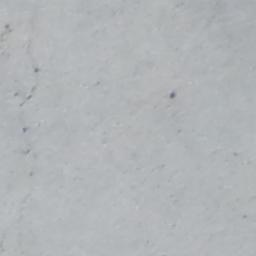

⚠️ No cracks to extract.

🖼️ Original image: CT (6).jpg


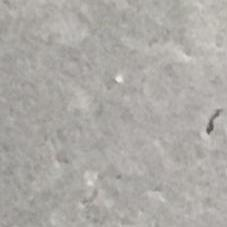

🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)

🖼️ Original image: CT (7).jpg


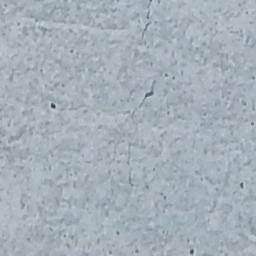

🧠 Prediction: 🔴 **Cracked Image**
🧩 4 crack(s) found in: CT (7).jpg
✅ Crack highlighted image saved to: crack_outputs/highlighted/highlighted_CT (7).jpg


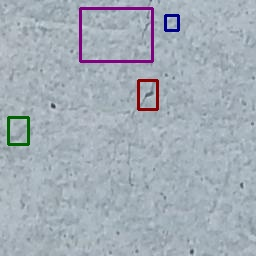

📦 Saving individual crack images:
  ➕ Saved: crack_outputs/individual_cracks/crack_1_CT (7).jpg


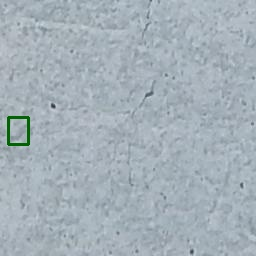

  ➕ Saved: crack_outputs/individual_cracks/crack_2_CT (7).jpg


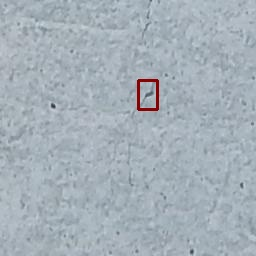

  ➕ Saved: crack_outputs/individual_cracks/crack_3_CT (7).jpg


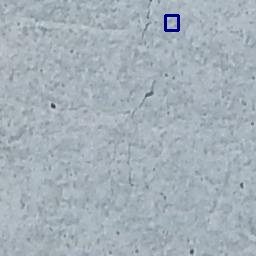

  ➕ Saved: crack_outputs/individual_cracks/crack_4_CT (7).jpg


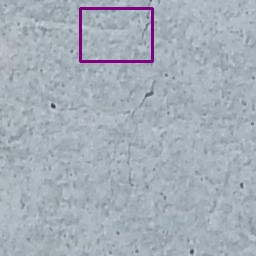


🖼️ Original image: CT (8).jpg


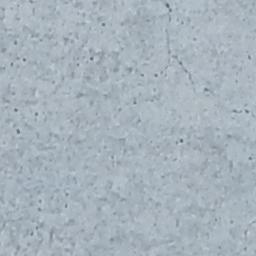

🧠 Prediction: 🔴 **Cracked Image**
🧩 2 crack(s) found in: CT (8).jpg
✅ Crack highlighted image saved to: crack_outputs/highlighted/highlighted_CT (8).jpg


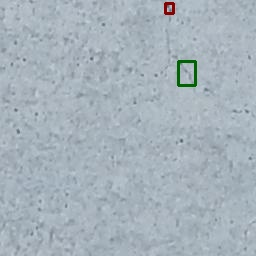

📦 Saving individual crack images:
  ➕ Saved: crack_outputs/individual_cracks/crack_1_CT (8).jpg


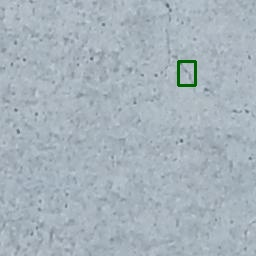

  ➕ Saved: crack_outputs/individual_cracks/crack_2_CT (8).jpg


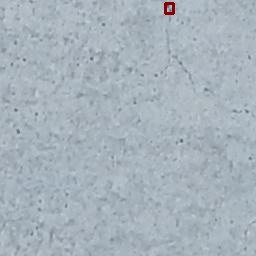


🖼️ Original image: CT (9).jpg


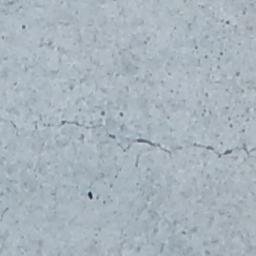

🧠 Prediction: 🔴 **Cracked Image**
🧩 3 crack(s) found in: CT (9).jpg
✅ Crack highlighted image saved to: crack_outputs/highlighted/highlighted_CT (9).jpg


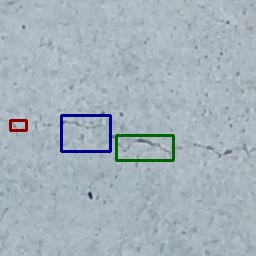

📦 Saving individual crack images:
  ➕ Saved: crack_outputs/individual_cracks/crack_1_CT (9).jpg


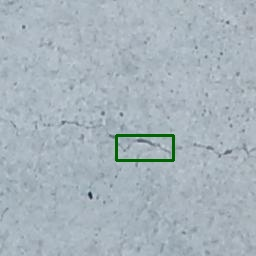

  ➕ Saved: crack_outputs/individual_cracks/crack_2_CT (9).jpg


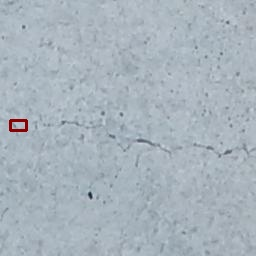

  ➕ Saved: crack_outputs/individual_cracks/crack_3_CT (9).jpg


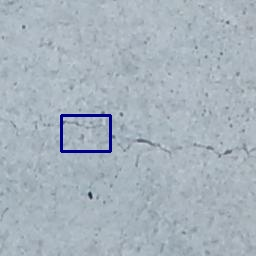


🖼️ Original image: CT (10).jpg


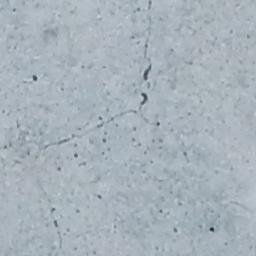

🧠 Prediction: 🔴 **Cracked Image**
🧩 4 crack(s) found in: CT (10).jpg
✅ Crack highlighted image saved to: crack_outputs/highlighted/highlighted_CT (10).jpg


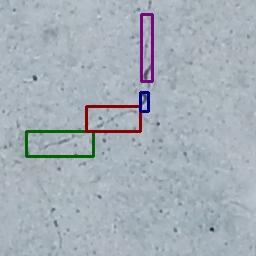

📦 Saving individual crack images:
  ➕ Saved: crack_outputs/individual_cracks/crack_1_CT (10).jpg


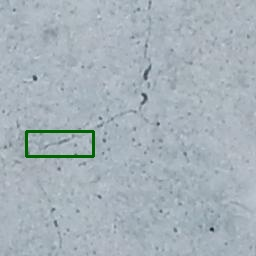

  ➕ Saved: crack_outputs/individual_cracks/crack_2_CT (10).jpg


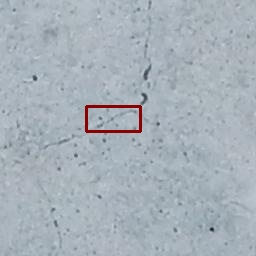

  ➕ Saved: crack_outputs/individual_cracks/crack_3_CT (10).jpg


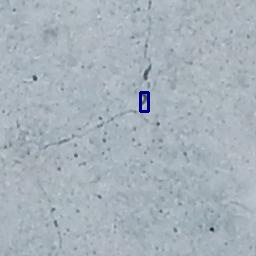

  ➕ Saved: crack_outputs/individual_cracks/crack_4_CT (10).jpg


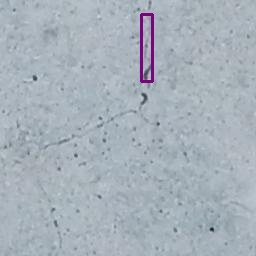


🖼️ Original image: CT (11).jpg


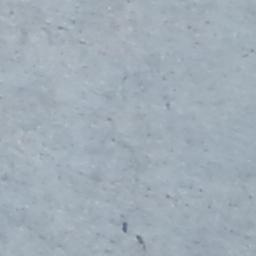

🧠 Prediction: 🔴 **Cracked Image**
🧩 2 crack(s) found in: CT (11).jpg
✅ Crack highlighted image saved to: crack_outputs/highlighted/highlighted_CT (11).jpg


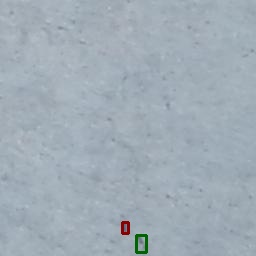

📦 Saving individual crack images:
  ➕ Saved: crack_outputs/individual_cracks/crack_1_CT (11).jpg


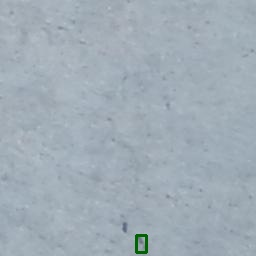

  ➕ Saved: crack_outputs/individual_cracks/crack_2_CT (11).jpg


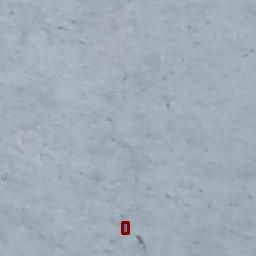


🖼️ Original image: CT (12).jpg


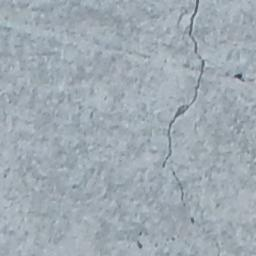

🧠 Prediction: 🔴 **Cracked Image**
🧩 3 crack(s) found in: CT (12).jpg
✅ Crack highlighted image saved to: crack_outputs/highlighted/highlighted_CT (12).jpg


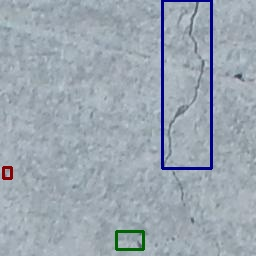

📦 Saving individual crack images:
  ➕ Saved: crack_outputs/individual_cracks/crack_1_CT (12).jpg


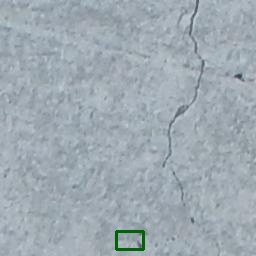

  ➕ Saved: crack_outputs/individual_cracks/crack_2_CT (12).jpg


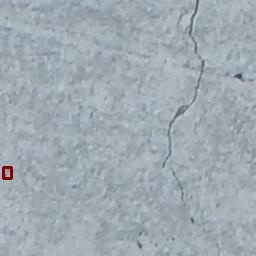

  ➕ Saved: crack_outputs/individual_cracks/crack_3_CT (12).jpg


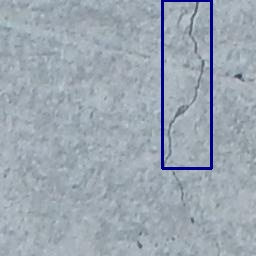


🖼️ Original image: CT (13).jpg


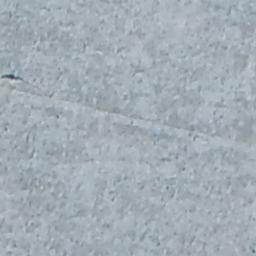

🧠 Prediction: 🔴 **Cracked Image**
🧩 1 crack(s) found in: CT (13).jpg
✅ Crack highlighted image saved to: crack_outputs/highlighted/highlighted_CT (13).jpg


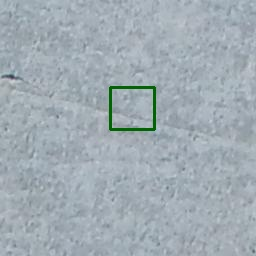

📦 Saving individual crack images:
  ➕ Saved: crack_outputs/individual_cracks/crack_1_CT (13).jpg


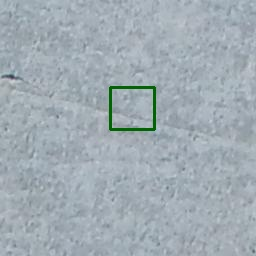


🖼️ Original image: CT (14).jpg


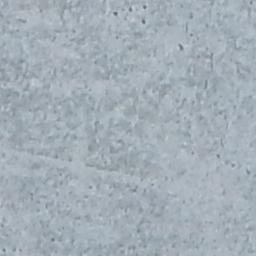

🧠 Prediction: 🔴 **Cracked Image**
🧩 1 crack(s) found in: CT (14).jpg
✅ Crack highlighted image saved to: crack_outputs/highlighted/highlighted_CT (14).jpg


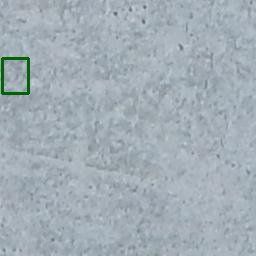

📦 Saving individual crack images:
  ➕ Saved: crack_outputs/individual_cracks/crack_1_CT (14).jpg


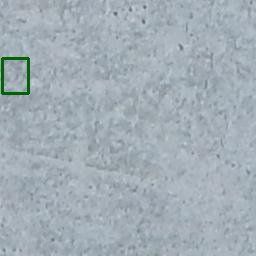


🖼️ Original image: CT (15).jpg


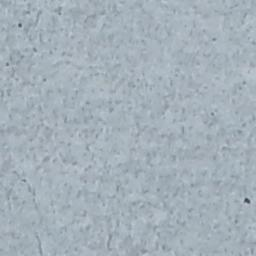

🧠 Prediction: 🔴 **Cracked Image**
🧩 1 crack(s) found in: CT (15).jpg
✅ Crack highlighted image saved to: crack_outputs/highlighted/highlighted_CT (15).jpg


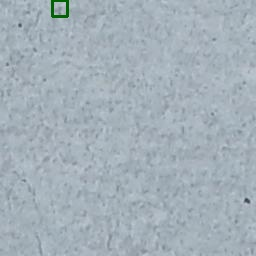

📦 Saving individual crack images:
  ➕ Saved: crack_outputs/individual_cracks/crack_1_CT (15).jpg


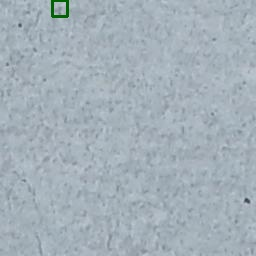


🖼️ Original image: CT (21).jpg


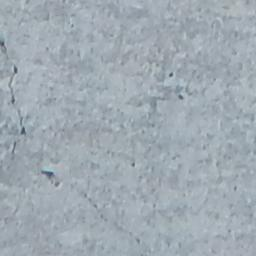

🧠 Prediction: 🔴 **Cracked Image**
🧩 3 crack(s) found in: CT (21).jpg
✅ Crack highlighted image saved to: crack_outputs/highlighted/highlighted_CT (21).jpg


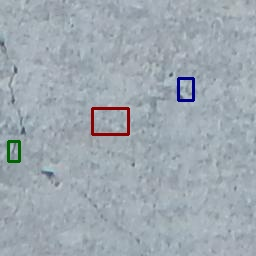

📦 Saving individual crack images:
  ➕ Saved: crack_outputs/individual_cracks/crack_1_CT (21).jpg


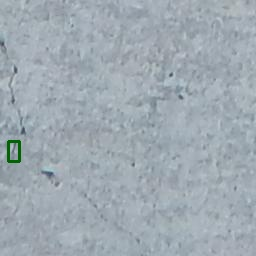

  ➕ Saved: crack_outputs/individual_cracks/crack_2_CT (21).jpg


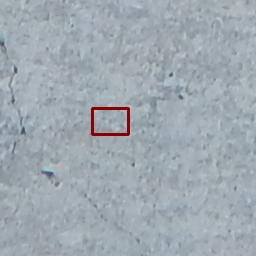

  ➕ Saved: crack_outputs/individual_cracks/crack_3_CT (21).jpg


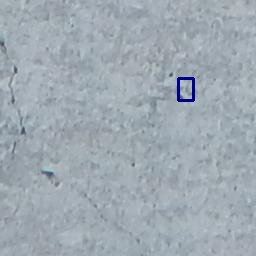


🖼️ Original image: CT (27).jpg


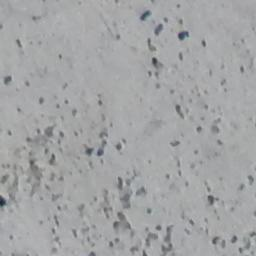

🧠 Prediction: 🔴 **Cracked Image**
🧩 20 crack(s) found in: CT (27).jpg
✅ Crack highlighted image saved to: crack_outputs/highlighted/highlighted_CT (27).jpg


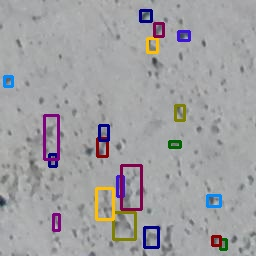

📦 Saving individual crack images:
  ➕ Saved: crack_outputs/individual_cracks/crack_1_CT (27).jpg


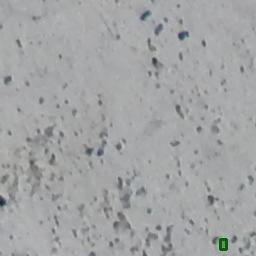

  ➕ Saved: crack_outputs/individual_cracks/crack_2_CT (27).jpg


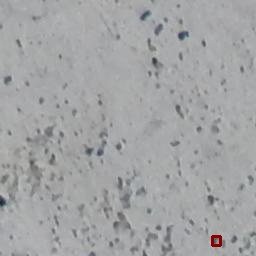

  ➕ Saved: crack_outputs/individual_cracks/crack_3_CT (27).jpg


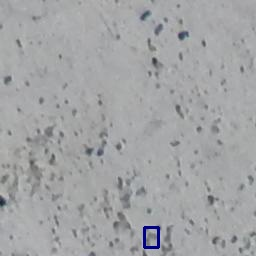

  ➕ Saved: crack_outputs/individual_cracks/crack_4_CT (27).jpg


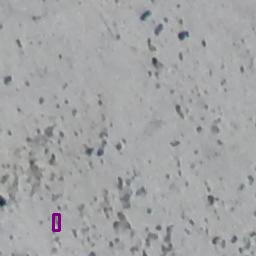

  ➕ Saved: crack_outputs/individual_cracks/crack_5_CT (27).jpg


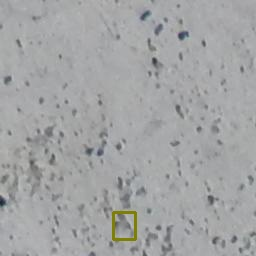

  ➕ Saved: crack_outputs/individual_cracks/crack_6_CT (27).jpg


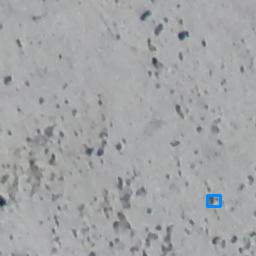

  ➕ Saved: crack_outputs/individual_cracks/crack_7_CT (27).jpg


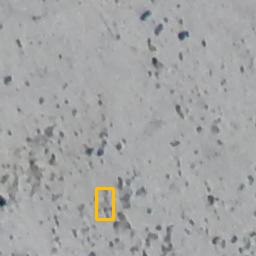

  ➕ Saved: crack_outputs/individual_cracks/crack_8_CT (27).jpg


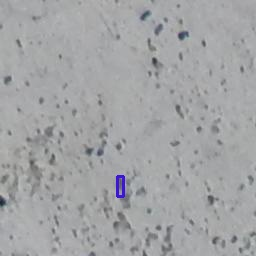

  ➕ Saved: crack_outputs/individual_cracks/crack_9_CT (27).jpg


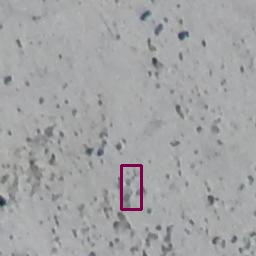

  ➕ Saved: crack_outputs/individual_cracks/crack_10_CT (27).jpg


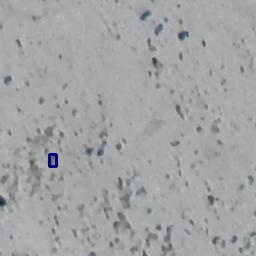

  ➕ Saved: crack_outputs/individual_cracks/crack_11_CT (27).jpg


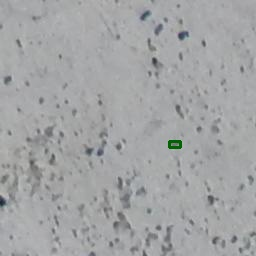

  ➕ Saved: crack_outputs/individual_cracks/crack_12_CT (27).jpg


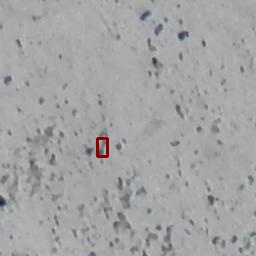

  ➕ Saved: crack_outputs/individual_cracks/crack_13_CT (27).jpg


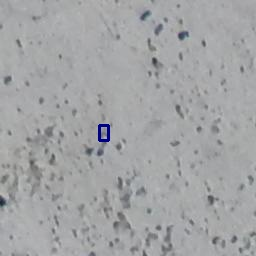

  ➕ Saved: crack_outputs/individual_cracks/crack_14_CT (27).jpg


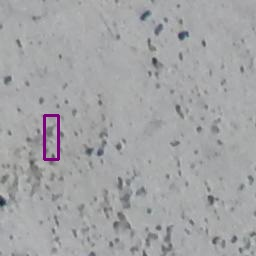

  ➕ Saved: crack_outputs/individual_cracks/crack_15_CT (27).jpg


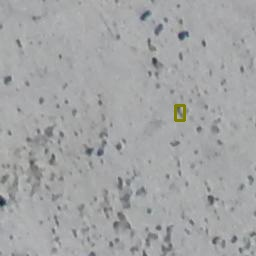

  ➕ Saved: crack_outputs/individual_cracks/crack_16_CT (27).jpg


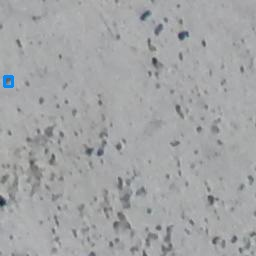

  ➕ Saved: crack_outputs/individual_cracks/crack_17_CT (27).jpg


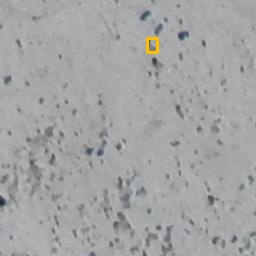

  ➕ Saved: crack_outputs/individual_cracks/crack_18_CT (27).jpg


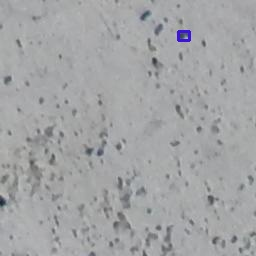

  ➕ Saved: crack_outputs/individual_cracks/crack_19_CT (27).jpg


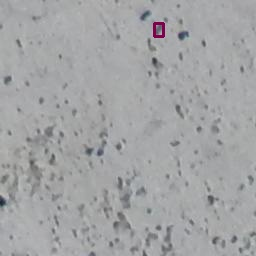

  ➕ Saved: crack_outputs/individual_cracks/crack_20_CT (27).jpg


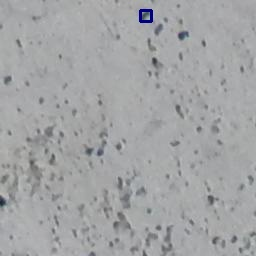


🖼️ Original image: CT (28).jpg


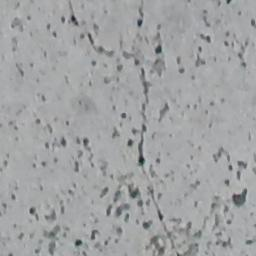

🧠 Prediction: 🔴 **Cracked Image**
🧩 27 crack(s) found in: CT (28).jpg
✅ Crack highlighted image saved to: crack_outputs/highlighted/highlighted_CT (28).jpg


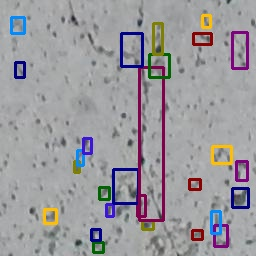

📦 Saving individual crack images:
  ➕ Saved: crack_outputs/individual_cracks/crack_1_CT (28).jpg


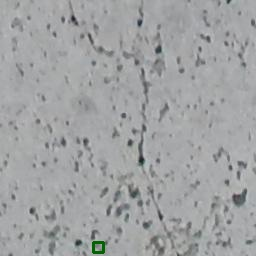

  ➕ Saved: crack_outputs/individual_cracks/crack_2_CT (28).jpg


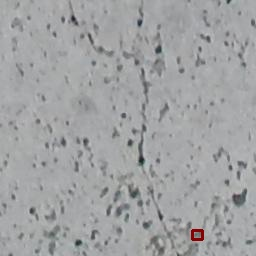

  ➕ Saved: crack_outputs/individual_cracks/crack_3_CT (28).jpg


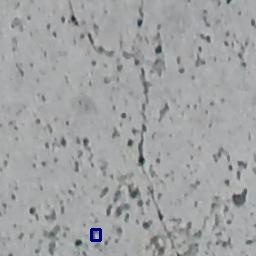

  ➕ Saved: crack_outputs/individual_cracks/crack_4_CT (28).jpg


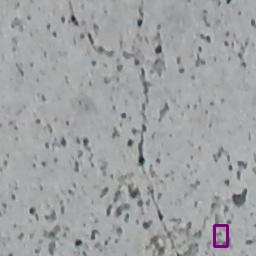

  ➕ Saved: crack_outputs/individual_cracks/crack_5_CT (28).jpg


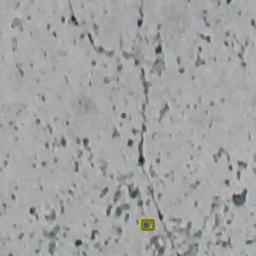

  ➕ Saved: crack_outputs/individual_cracks/crack_6_CT (28).jpg


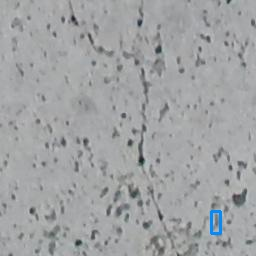

  ➕ Saved: crack_outputs/individual_cracks/crack_7_CT (28).jpg


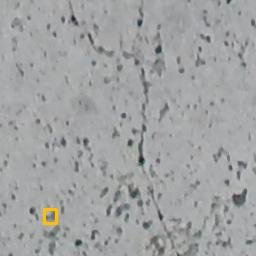

  ➕ Saved: crack_outputs/individual_cracks/crack_8_CT (28).jpg


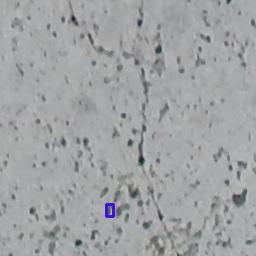

  ➕ Saved: crack_outputs/individual_cracks/crack_9_CT (28).jpg


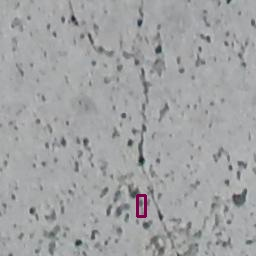

  ➕ Saved: crack_outputs/individual_cracks/crack_10_CT (28).jpg


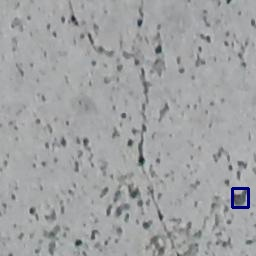

  ➕ Saved: crack_outputs/individual_cracks/crack_11_CT (28).jpg


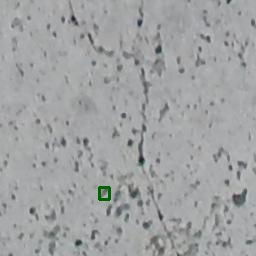

  ➕ Saved: crack_outputs/individual_cracks/crack_12_CT (28).jpg


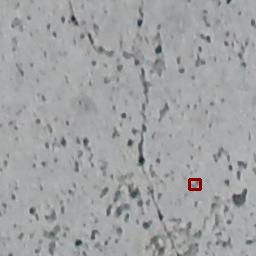

  ➕ Saved: crack_outputs/individual_cracks/crack_13_CT (28).jpg


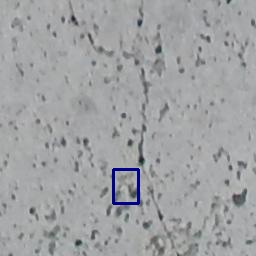

  ➕ Saved: crack_outputs/individual_cracks/crack_14_CT (28).jpg


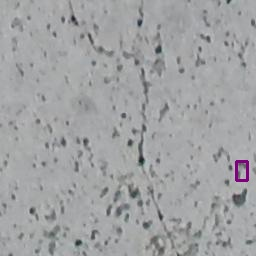

  ➕ Saved: crack_outputs/individual_cracks/crack_15_CT (28).jpg


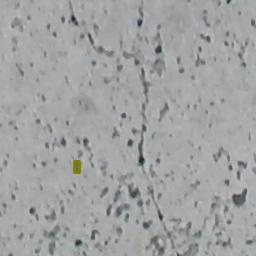

  ➕ Saved: crack_outputs/individual_cracks/crack_16_CT (28).jpg


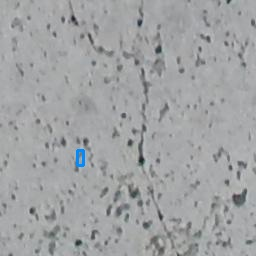

  ➕ Saved: crack_outputs/individual_cracks/crack_17_CT (28).jpg


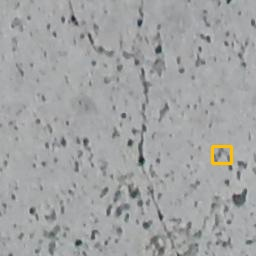

  ➕ Saved: crack_outputs/individual_cracks/crack_18_CT (28).jpg


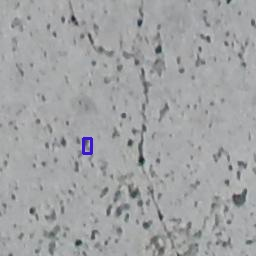

  ➕ Saved: crack_outputs/individual_cracks/crack_19_CT (28).jpg


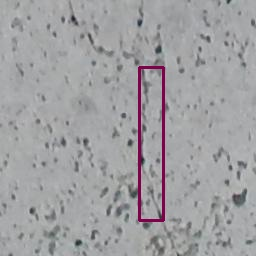

  ➕ Saved: crack_outputs/individual_cracks/crack_20_CT (28).jpg


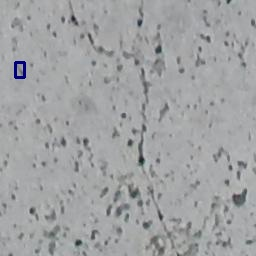

  ➕ Saved: crack_outputs/individual_cracks/crack_21_CT (28).jpg


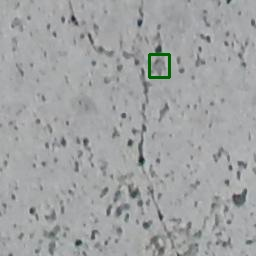

  ➕ Saved: crack_outputs/individual_cracks/crack_22_CT (28).jpg


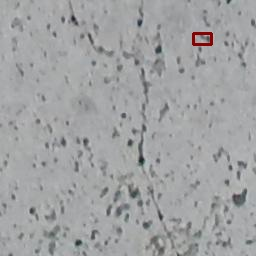

  ➕ Saved: crack_outputs/individual_cracks/crack_23_CT (28).jpg


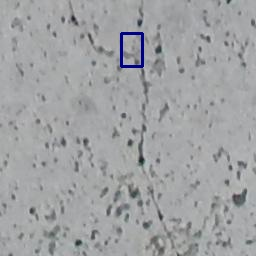

  ➕ Saved: crack_outputs/individual_cracks/crack_24_CT (28).jpg


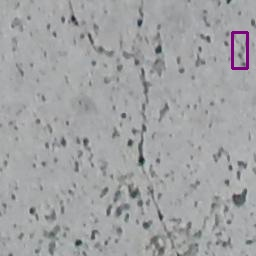

  ➕ Saved: crack_outputs/individual_cracks/crack_25_CT (28).jpg


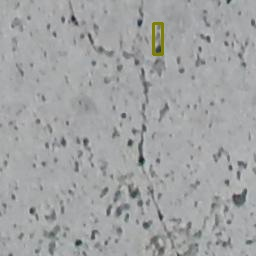

  ➕ Saved: crack_outputs/individual_cracks/crack_26_CT (28).jpg


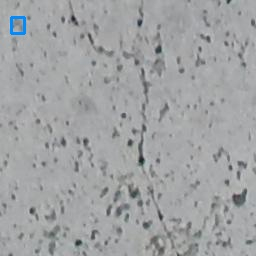

  ➕ Saved: crack_outputs/individual_cracks/crack_27_CT (28).jpg


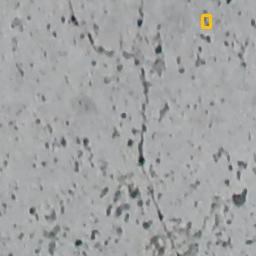


🖼️ Original image: N (53).jpg


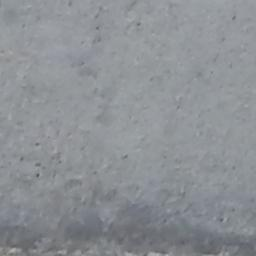

🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)

🖼️ Original image: N (54).jpg


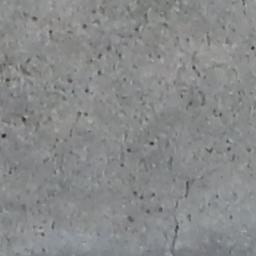

🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)

🖼️ Original image: N (55).jpg


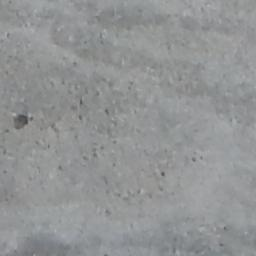

🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)

🖼️ Original image: N (56) (1).jpg


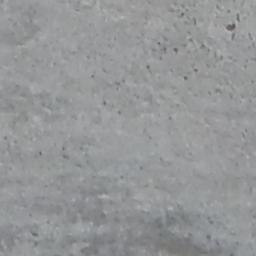

🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)

🖼️ Original image: N (57).jpg


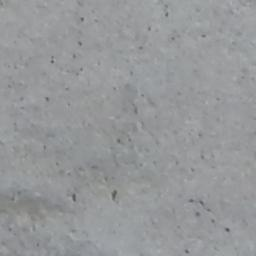

🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)

🖼️ Original image: N (58) (1).jpg


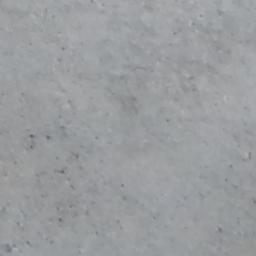

🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)

🖼️ Original image: N (59).jpg


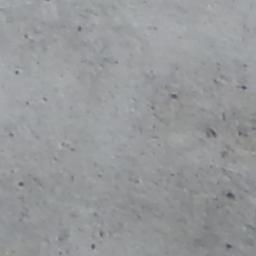

🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)

🖼️ Original image: N (60).jpg


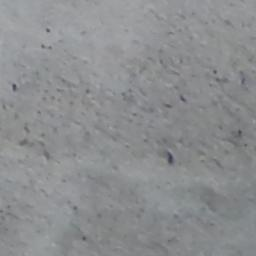

🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)

🖼️ Original image: N (65).jpg


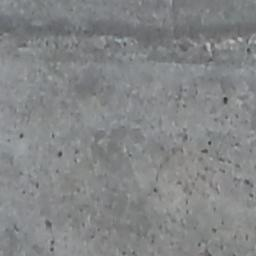

🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)

🖼️ Original image: N (66).jpg


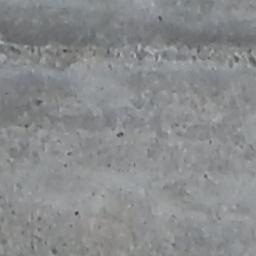

🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)

🖼️ Original image: N (68).jpg


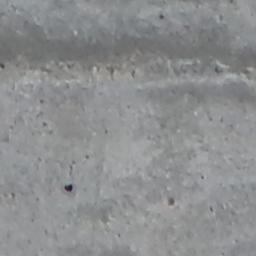

🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)

🖼️ Original image: N (69) (1).jpg


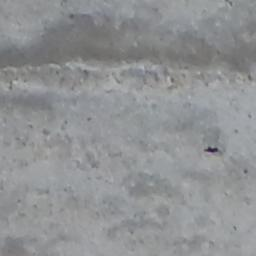

🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)

🖼️ Original image: N (70).jpg


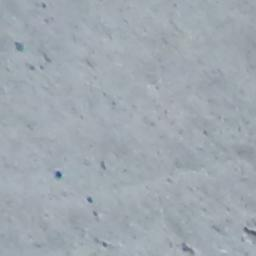

🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)


In [ ]:
# ✅ Imports
import torch
import torch.nn as nn
from torchvision.models import resnet18
from torchvision import transforms
from PIL import Image
import os
import cv2
import numpy as np
from IPython.display import Image as IPyImage, display

# ✅ Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Image transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ✅ Load model
model = resnet18(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 2)
)
model.load_state_dict(torch.load("crack_model.pth", map_location=device))
model.to(device)
model.eval()

# ✅ Crack highlighting function
def highlight_and_save_cracks(img_path):
    filename = os.path.basename(img_path)
    base_name = os.path.splitext(filename)[0]

    all_output_dir = "crack_outputs/highlighted"
    individual_output_dir = "crack_outputs/individual_cracks"
    os.makedirs(all_output_dir, exist_ok=True)
    os.makedirs(individual_output_dir, exist_ok=True)

    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ Error reading image: {img_path}")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 30, 120)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter valid cracks
    min_area = 30
    real_cracks = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
    print(f"🧩 {len(real_cracks)} crack(s) found in: {filename}")

    # All cracks in one image
    all_img = img.copy()
    colors = [(0, 100, 0), (0, 0, 139), (139, 0, 0), (128, 0, 128), (0, 128, 128),
              (255, 140, 0), (0, 191, 255), (220, 20, 60), (75, 0, 130), (128, 0, 0)]

    for i, cnt in enumerate(real_cracks):
        x, y, w, h = cv2.boundingRect(cnt)
        color = colors[i % len(colors)]
        cv2.rectangle(all_img, (x, y), (x + w, y + h), color, 2)

    all_path = os.path.join(all_output_dir, f"highlighted_{filename}")
    cv2.imwrite(all_path, all_img)
    print(f"✅ Crack highlighted image saved to: {all_path}")
    display(IPyImage(all_path))

    # One image per crack
    if len(real_cracks) == 0:
        print("⚠️ No cracks to extract.")
        return

    print("📦 Saving individual crack images:")
    for i, cnt in enumerate(real_cracks):
        indiv_img = img.copy()
        x, y, w, h = cv2.boundingRect(cnt)
        color = colors[i % len(colors)]
        cv2.rectangle(indiv_img, (x, y), (x + w, y + h), color, 2)

        indiv_path = os.path.join(individual_output_dir, f"crack_{i+1}_{filename}")
        cv2.imwrite(indiv_path, indiv_img)
        print(f"  ➕ Saved: {indiv_path}")
        display(IPyImage(indiv_path))

# ✅ Prediction + Display + Highlighting
def predict_and_show(image_path):
    print(f"\n🖼️ Original image: {os.path.basename(image_path)}")
    display(IPyImage(image_path))

    image = Image.open(image_path).convert("RGB")
    img_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img_tensor)
        predicted = torch.argmax(output, 1).item()

    if predicted == 0:
        print(f"🧠 Prediction: 🔴 **Cracked Image**")
        highlight_and_save_cracks(image_path)
    else:
        print(f"🧠 Prediction: 🟢 **Uncracked Image** (no cracks to highlight)")

# ✅ Run on uploaded images
for file_name in uploaded.keys():
    predict_and_show(file_name)


In [ ]:
import torch
import torch.nn as nn
from torchvision.models import resnet18

model = resnet18(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(128, 2)
)

# Let's say you trained the model and now want to save it:
torch.save(model.state_dict(), "crack_model.pth")
print("✅ Model saved as crack_model.pth")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Model saved as crack_model.pth


In [ ]:
from google.colab import files
files.download("crack_model.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import output
from IPython.display import display, Javascript

def list_code_cells():
    """Lists the content of all code cells in the current notebook using Javascript."""
    js_code = """
    var cells = google.colab.notebook.getCells();
    var code_cells = cells.filter(cell => cell.cell_type === 'code');
    var code_content = code_cells.map(cell => cell.source).join('\\n---\\n');
    google.colab.kernel.invokeFunction('notebook.RunCell', [code_content], {});
    """
    display(Javascript(js_code))

def handle_javascript_output(code_content):
    """Callback function to print the code cell content."""
    all_code = code_content[0]
    cells = all_code.split('\\n---\\n')
    for i, code in enumerate(cells):
        print(f"### Code Cell {i+1}\n```python\n{code}\n```\n---")

output.register_callback('notebook.RunCell', handle_javascript_output)

list_code_cells()

<IPython.core.display.Javascript object>